# Определение перспективного тарифа для телеком компании

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

#### Описание тарифов

##### Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

##### Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

**Обратите внимание:** «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

**Описание данных**

Таблица users (информация о пользователях):

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана

Таблица calls (информация о звонках):

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета 

## Шаг 1. Знакомство с данными.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [31]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [32]:
df_inet = pd.read_csv('/datasets/internet.csv')
df_inet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [33]:
df_inet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [34]:
df_sms = pd.read_csv('/datasets/messages.csv')
df_sms.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [35]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [36]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_tariffs

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Переименуем *mg_per_month_included* в *mb_per_month_included*, *tariff_name* в *tariff* , а также пересчитаем цену за Гб в цену за Мб для удобства в дальнейших расчетах.

In [37]:
df_tariffs = (df_tariffs
                .rename(columns={'tariff_name':'tariff', 'mg_per_month_included':'mb_per_month_included', 'rub_per_gb':'rub_per_mb'})
             )
df_tariffs['rub_per_mb'] = df_tariffs['rub_per_mb'] / 1024
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_mb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,0.195312,3,3,smart
1,1000,30720,3000,1950,0.146484,1,1,ultra


In [38]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [39]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [40]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [41]:
# соединим в одну таблицу инф-цию о тарифах и клиентах - потом это пригодится
users_tariffs = df_users.merge(df_tariffs)

### Вывод

На этапе знакомства с данными можно заключить, что 

- стоит изменить тип данных для столбца с датой во всех таблицах, где она есть;
- для удобства в дальнейшем анализе нужно произвести объединение таблиц

## Шаг 2. Предобработка данных.

Округлим наверх дробные значения использованных мегабайтов и минут разговора.

In [42]:
import numpy as np

In [43]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_inet['mb_used'] = df_inet['mb_used'].apply(np.ceil)

In [44]:
# назначим в этих таблицах столбец с user_id столбцом индексов, чтобы в дальнейшем соединить их методом join()
df_calls.set_index('user_id', inplace=True)
df_sms.set_index('user_id', inplace=True)

Проверим, нет ли неявных дубликатов в названиях тарифов:

In [45]:
df_users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

In [46]:
# приводим к правильному формату даты
df_inet['session_date'] = pd.to_datetime(df_inet['session_date'], format='%Y-%m-%d')
df_inet['month_inet'] = df_inet['session_date'].dt.month
df_sms['message_date'] = pd.to_datetime(df_sms['message_date'], format='%Y-%m-%d')
df_sms['month_sms'] = df_sms['message_date'].dt.month
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['month_call'] = df_calls['call_date'].dt.month

*df_calls*: Проверим, что уникальный идентификатор для каждого звонка действительно уникален и нет неожиданных повторов:

In [47]:
len(df_calls['id'].unique())

202607

In [48]:
df_calls.query('duration == 0')

,id,call_date,duration,month_call
user_id,,,,
1000,1000_0,2018-07-25,0.0,7
1000,1000_1,2018-08-17,0.0,8
1000,1000_5,2018-11-02,0.0,11
1000,1000_6,2018-10-18,0.0,10
1000,1000_9,2018-08-15,0.0,8
...,...,...,...,...
1499,1499_203,2018-12-03,0.0,12
1499,1499_205,2018-10-13,0.0,10
1499,1499_206,2018-12-26,0.0,12


In [49]:
len(df_calls.query('duration == 0')) / len(df_calls)

0.19551644316336553

Почти 20% записей - звонки с нулевой продолжительностью разговора. Исходя из формата данных в этом столбце, скорее всего это вызовы с длительностью меньше 0.01 минуты (то есть меньше 0.6 секунд). Поэтому будет логично округлить их до 1 минуты.

In [50]:
df_calls.loc[df_calls['duration'] == 0, 'duration'] = 1
df_calls

,id,call_date,duration,month_call
user_id,,,,
1000,1000_0,2018-07-25,1.0,7
1000,1000_1,2018-08-17,1.0,8
1000,1000_2,2018-06-11,3.0,6
1000,1000_3,2018-09-21,14.0,9
1000,1000_4,2018-12-15,6.0,12
...,...,...,...,...
1499,1499_215,2018-12-26,1.0,12
1499,1499_216,2018-10-18,19.0,10
1499,1499_217,2018-11-10,11.0,11


In [51]:
# считаем количество смс для каждого пользователя по месяцам
sms_by_month = df_sms.pivot_table(index=['user_id', 'month_sms'], values='id', aggfunc='count')
sms_by_month

id
user_id month_sms    
1000    5          22
        6          60
        7          75
        8          81
        9          57
...                ..
1498    10         42
1499    9          11
        10         48
        11         59
        12         66

[2717 rows x 1 columns]

In [52]:
# считаем число потраченных мегабайт трафика, количество звонков и потраченных минут для каждого пользователя по месяцам
mb_by_month = df_inet.pivot_table(index=['user_id', 'month_inet'], values='mb_used', aggfunc='sum')
calls_by_month = (df_calls.pivot_table(index=['user_id', 'month_call'], values='duration', aggfunc=['sum', 'count'])
                          .rename(columns={'sum':'duration', 'count':'number_calls'})
                 )
calls_by_month.columns = calls_by_month.columns.droplevel(1) # удаляем мультииндекс в столбцах
calls_by_month

duration  number_calls
user_id month_call                        
1000    5              164.0            22
        6              187.0            43
        7              346.0            47
        8              418.0            52
        9              478.0            58
...                      ...           ...
1498    10             258.0            41
1499    9               71.0             9
        10             473.0            68
        11             624.0            74
        12             505.0            69

[3174 rows x 2 columns]

In [53]:
# соединяем все 3 услуги в одну таблицу
all_sources = (mb_by_month.join([sms_by_month,calls_by_month], how='outer')
                          .rename(columns={'id':'sms_sent', 'duration':'talks_duration'})
              )
all_sources

mb_used  sms_sent  talks_duration  number_calls
1000 5    2256.0      22.0           164.0          22.0
     6   23257.0      60.0           187.0          43.0
     7   14016.0      75.0           346.0          47.0
     8   14070.0      81.0           418.0          52.0
     9   14581.0      57.0           478.0          58.0
...          ...       ...             ...           ...
1498 10  20604.0      42.0           258.0          41.0
1499 9    1848.0      11.0            71.0           9.0
     10  17809.0      48.0           473.0          68.0
     11  17984.0      59.0           624.0          74.0
     12  13077.0      66.0           505.0          69.0

[3214 rows x 4 columns]

In [54]:
# добавим в таблицу явно месяцы и идентификаторы пользователей, т.к. обращение к ним по мультииндексам неудобно
all_sources['user_id'] = all_sources.index.get_level_values(0)
all_sources['month'] = all_sources.index.get_level_values(1)
data = all_sources.merge(users_tariffs, how='outer') # здесь вся необходимая информация для анализа 
data

,mb_used,sms_sent,talks_duration,number_calls,user_id,month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_mb,rub_per_message,rub_per_minute
0,2256.0,22.0,164.0,22.0,1000,5.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,0.146484,1,1
1,23257.0,60.0,187.0,43.0,1000,6.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,0.146484,1,1
2,14016.0,75.0,346.0,47.0,1000,7.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,0.146484,1,1
3,14070.0,81.0,418.0,52.0,1000,8.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,0.146484,1,1
4,14581.0,57.0,478.0,58.0,1000,9.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,0.146484,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,17809.0,48.0,473.0,68.0,1499,10.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,0.195312,3,3
3212,17984.0,59.0,624.0,74.0,1499,11.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,0.195312,3,3
3213,13077.0,66.0,505.0,69.0,1499,12.0,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,0.195312,3,3
3214,NaN,NaN,NaN,NaN,1128,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,0.146484,1,1


In [55]:
# ф-ция, которая считает суммарную месячную выручку по каждому клиенту
def earned(row): 
    revenue_sms, revenue_talks, revenue_mb, summa = float, float, float, float
    if row['sms_sent'] > row['messages_included']:
        revenue_sms = (row['sms_sent'] - row['messages_included']) * row['rub_per_message']
    else:
        revenue_sms = 0
    if row['talks_duration'] > row['minutes_included']:
        revenue_talks = (row['talks_duration'] - row['minutes_included']) * row['rub_per_minute']
    else:
        revenue_talks = 0
    if row['mb_used'] > row['mb_per_month_included']:
        revenue_mb = (row['mb_used'] - row['mb_per_month_included']) * row['rub_per_mb']
    else:
        revenue_mb = 0
    
    return round(revenue_sms + revenue_talks + revenue_mb + row['rub_monthly_fee'], 1)

data['total_revenue'] = data.apply(earned, axis=1)
data

,mb_used,sms_sent,talks_duration,number_calls,user_id,month,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_mb,rub_per_message,rub_per_minute,total_revenue
0,2256.0,22.0,164.0,22.0,1000,5.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,0.146484,1,1,1950.0
1,23257.0,60.0,187.0,43.0,1000,6.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,0.146484,1,1,1950.0
2,14016.0,75.0,346.0,47.0,1000,7.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,0.146484,1,1,1950.0
3,14070.0,81.0,418.0,52.0,1000,8.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,0.146484,1,1,1950.0
4,14581.0,57.0,478.0,58.0,1000,9.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,0.146484,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,17809.0,48.0,473.0,68.0,1499,10.0,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,0.195312,3,3,1028.3
3212,17984.0,59.0,624.0,74.0,1499,11.0,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,0.195312,3,3,1461.5
3213,13077.0,66.0,505.0,69.0,1499,12.0,35,NaN,Пермь,Гектор,...,2018-09-27,smart,50,15360,500,550,0.195312,3,3,613.0
3214,NaN,NaN,NaN,NaN,1128,NaN,51,2018-12-23,Волжский,Ксения,...,2018-12-15,ultra,1000,30720,3000,1950,0.146484,1,1,1950.0


In [56]:
#data['total_revenue'].describe(percentiles='95')

На данном этапе:

- было посчитано количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика по месяцам;
- была посчитана месячная выручка от каждого клиента
- необходимые для анализа данные собраны в одну таблицу

## Шаг 3. Анализ поведения клиентов.

In [57]:
import seaborn as sb

In [58]:
# ф-ция, к-я будет строить гистограммы для трёх изучаемых параметров
def plot_hist(df, source):
    axis = (df[df['tariff'] == 'smart'][source]
            .plot(kind='hist', bins=50, grid=True, figsize=(6,6), label='smart', legend=True)
           )
    df[df['tariff'] == 'ultra'][source].plot(kind='hist', bins=50, grid=True,  figsize=(6,6), alpha=0.5,
                                             label='ultra', ax=axis, legend=True, title=source)
    sb.set()
    plt.show()

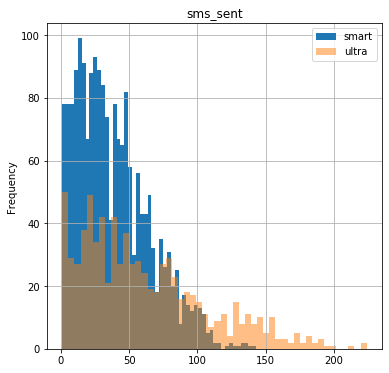

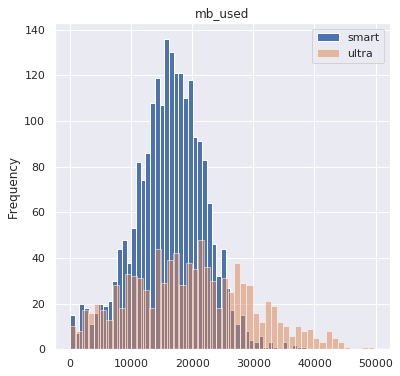

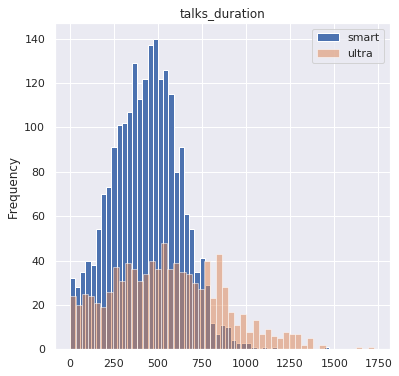

In [59]:
plot_hist(data, 'sms_sent')
plot_hist(data, 'mb_used')
plot_hist(data, 'talks_duration')

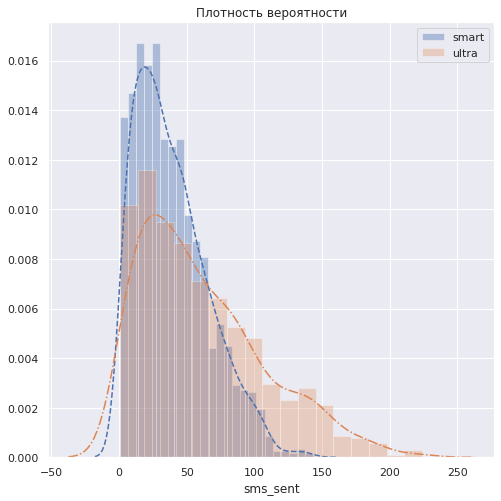

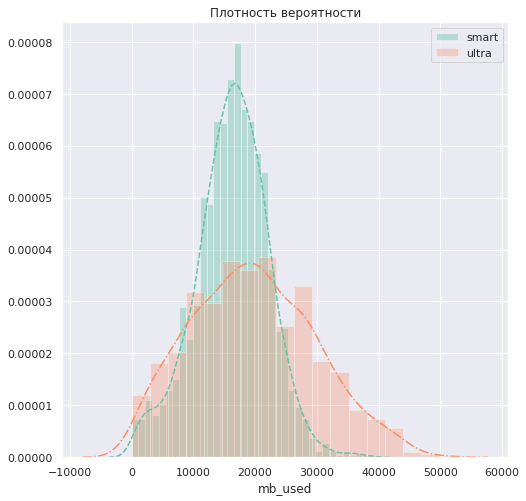

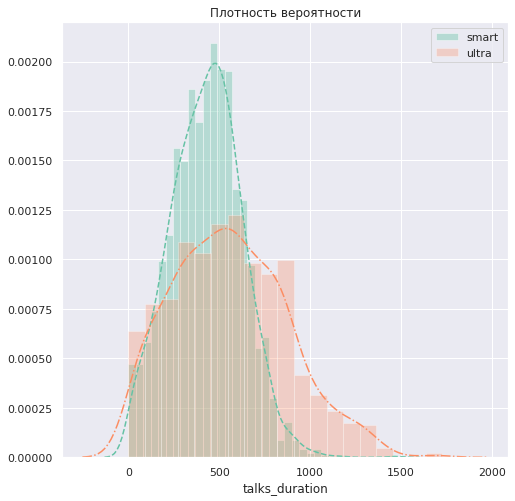

In [60]:
def plot_density(df, source):
    plt.figure(figsize=(8,8))
    axis = sb.distplot(df[(df['tariff'] == 'smart') & (df[source].isna() == False)][source], label='smart',
                       kde_kws={'linestyle':'--'})
    sb.distplot(df[(df['tariff'] == 'ultra') & (df[source].isna() == False)][source], ax=axis, label='ultra',
                hist_kws={'alpha':0.3}, kde_kws={'linestyle':'-.'})
    plt.legend()
    axis.set(title='Плотность вероятности')
    sb.set_palette("Set2")
    plt.show()
    
plot_density(data, 'sms_sent')
plot_density(data, 'mb_used')
plot_density(data, 'talks_duration')

По данным гистограммам можно сказать о характере распределений. Распределения числа смс и минут разговора смещены вправо. Логично, что чем больше минут и смс входит в тариф, тем длинее правый хвост такого распределения. Хоть для "Ультры" лимит сообщений 1000, а минут 3000, редко кто выходит за 200 и 1500, соответственно. Распределение потраченных мегабайт для обоих тарифов более менее симметричны и их максимумы практически совпадают (в интервале 17000 - 20000 Мб). БОльшая часть распределения мегабайт для "Смарта" лежит в области за лимитом трафика: многие клиенты данного тарифа переплачивают за интернет.

In [61]:
import numpy as np

Среднее количество, дисперсию и стандартное отклонение трех изучаемых величин (минуты разговора, кол-во сообщений и объём интернет-трафика) поместим в одну таблицу, чтобы было удобнее сравнивать.

In [62]:
tariff_month = (data.pivot_table(index='month', 
                                 columns='tariff',
                                 values=['mb_used', 'sms_sent', 'talks_duration'],
                                 aggfunc={'mean', np.var, np.std})
                    .rename(columns={'std':'standard_deviation', 'var':'variation'})
               )
tariff_month

mb_used                                                 \
                mean               standard_deviation                 
tariff         smart         ultra              smart         ultra   
month                                                                 
1.0      8524.441176  13153.555556        6451.837940   6872.147046   
2.0     11611.396552  12858.500000        6254.546293  10482.912471   
3.0     15123.857143  17551.972973        5835.460138  10961.936316   
4.0     13479.482143  16843.800000        5705.029114   9727.483304   
5.0     15825.198582  19674.848485        5985.177978   9838.948697   
6.0     15814.768293  19170.457831        5797.966469   9118.618095   
7.0     15763.512438  20742.588889        5904.328642   9891.235899   
8.0     16703.252137  19778.915094        5505.070456  10359.164436   
9.0     16324.526923  19390.824561        5202.129029   9362.053368   
10.0    16778.564626  20228.327869        5866.609964   9680.554593   
11.0    16917.531646  19954.225564        5346.823769   9802.627285   
12.0    18136.833828  21971.659420        5580.397230  10256.429423   

                                     sms_sent                                \
           variation                     mean            standard_deviation   
tariff         smart         ultra      smart      ultra              smart   
month                                                                         
1.0     4.162621e+07  4.722641e+07  20.000000  43.428571          15.878707   
2.0     3.911935e+07  1.098915e+08  27.940000  32.937500          20.987275   
3.0     3.405260e+07  1.201640e+08  35.550725  47.800000          25.880117   
4.0     3.254736e+07  9.462393e+07  35.864583  44.512821          22.756662   
5.0     3.582236e+07  9.680491e+07  39.032787  48.769231          25.274014   
6.0     3.361642e+07  8.314920e+07  38.577465  52.313433          27.048767   
7.0     3.486110e+07  9.783655e+07  38.988506  62.136986          26.820747   
8.0     3.030580e+07  1.073123e+08  38.750000  58.897727          27.698611   
9.0     2.706215e+07  8.764804e+07  39.219731  63.294737          26.504821   
10.0    3.441711e+07  9.371314e+07  39.082677  69.776699          27.138589   
11.0    2.858852e+07  9.609150e+07  39.881481  66.159292          26.671359   
12.0    3.114083e+07  1.051943e+08  42.264808  72.008547          28.852160   

                                           talks_duration              \
                    variation                        mean               
tariff      ultra       smart        ultra          smart       ultra   
month                                                                   
1.0     27.663798  252.133333   765.285714     209.647059  440.888889   
2.0     26.709471  440.465714   713.395833     306.310345  304.666667   
3.0     42.739521  669.780477  1826.666667     400.532468  503.081081   
4.0     37.526743  517.865680  1408.256410     377.000000  487.811321   
5.0     39.491183  638.775776  1559.553544     398.404255  549.468750   
6.0     43.996284  731.635801  1935.672999     409.196319  510.666667   
7.0     46.805245  719.352468  2190.730974     419.288557  579.397727   
8.0     44.977399  767.213054  2022.966432     435.042735  544.941748   
9.0     43.666501  702.505555  1906.763270     441.779923  573.594595   
10.0    49.260598  736.503019  2426.606511     439.791809  597.101695   
11.0    47.426742  711.361366  2249.295828     449.041270  577.348837   
12.0    48.609368  832.447114  2362.870616     492.880952  631.858209   

                                                                    
       standard_deviation                 variation                 
tariff              smart       ultra         smart          ultra  
month                                                               
1.0            158.869087  279.972518  25239.386809   78384.611111  
2.0            195.012749  304.279858  38029.972172   92586.231884  
3.0            196.274283  3

In [63]:
# ф-ция, строящая столбчатые диаграммы для средних значений для каждого месяца
def plot_average_by_month(df, source):
    df[source]['mean'].plot(kind='bar',legend=True, title=source, grid=True, figsize=(6,6))
    plt.show()

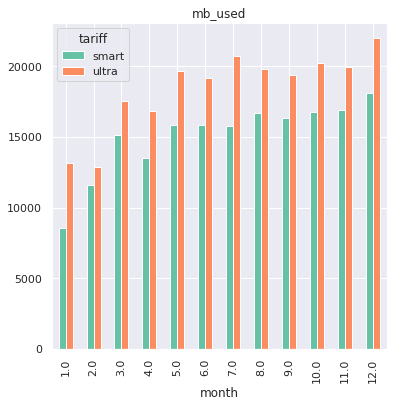

In [64]:
plot_average_by_month(tariff_month, 'mb_used')

В среднем в 8-ми месяцах из 12 пользователи "Смарта" вышли за лимит 15 Гб.

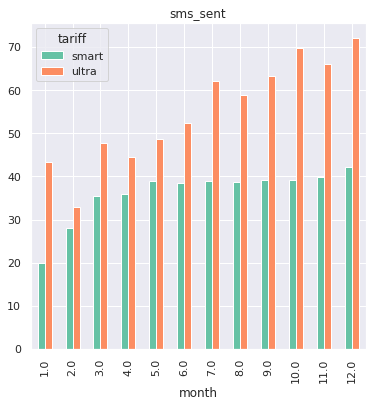

In [65]:
plot_average_by_month(tariff_month, 'sms_sent')

В среднем пользователи "Смарта" отправляют около 40 смс ежемесячно, колебания от месяца к месяцу в большинстве своем незначительны. Клиенты "Ультры", обладающие в этом плане большей свободой, отправляют в среднем больше смс. Однако эта разница не соизмерима с их лимитом: максимальное среднее наблюдается в декабре, около 73 сообщений.

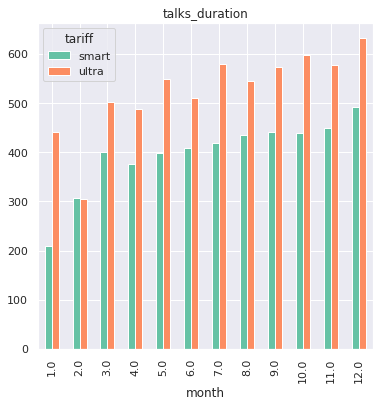

In [66]:
plot_average_by_month(tariff_month, 'talks_duration')

## Вывод

На данном этапе:

- посчитаны среднемесячное количество, дисперсия и стандартное отклонение для минут, трафика и смс для обоих тарифов 
- построены гистограммы

## Шаг 4. Проверка гипотез.

In [67]:
revenue_smart = data.query('tariff == "smart"')['total_revenue']
revenue_ultra = data.query('tariff == "ultra"')['total_revenue']

In [68]:
from scipy import stats as st

Нулевая гипотеза: "средняя выручка пользователей тарифов «Ультра» и «Смарт» приблизительно равна"
Альтернатива: "средняя выручка пользователей тарифа «Ультра» больше"
Целесообразно проверять нашу гипотезу против данной альтернативы, т.к. цены "Ультры" значительно выше.

In [69]:
alpha = 0.05
results = st.ttest_ind(
    revenue_smart, 
    revenue_ultra, equal_var=False)
if results.pvalue < alpha and revenue_smart.mean() < revenue_ultra.mean():
     print("Принимаем альтернативную гипотезу")
else:
    print("Принимаем нулевую гипотезу")
    
print('p-value:',results.pvalue)

Принимаем альтернативную гипотезу
p-value: 1.3056728819483522e-282


In [70]:
results

Ttest_indResult(statistic=-39.8544531698946, pvalue=1.3056728819483522e-282)

Нулевая гипотеза: "средняя выручка пользователей из Москвы и из других городов приблизительно равна".
В данном случае проверять эту гипотезу имеет смысл против альтернативы "средняя выручка от пользователей из Москвы и из других городов различна", т.к. на данном этапе у нас нет достаточных оснований предполагать что-то более конкретное.

In [71]:
revenue_moscow = data.query('city == "Москва"')['total_revenue']
revenue_other_cities = data.query('city != "Москва"')['total_revenue']

In [72]:
results_1 = st.ttest_ind(
    revenue_moscow, 
    revenue_other_cities, equal_var=False)
if results_1.pvalue < alpha:
    print("Принимаем альтернативную гипотезу")
else:
    print("Принимаем нулевую гипотезу")
print('p-value:',results_1.pvalue)

Принимаем нулевую гипотезу
p-value: 0.49791916135103


## Вывод

Были сформулированы и проверены 2 гипотезы о средней выручке от пользователей.

## Общий вывод

В результате работы были проиллюстрированы основные паттерны в поведении клиентов тарифов "Ультра" и "Смарт".

- Среди клиентов "Ультры" наблюдаются выходы за пределы лимита, включенного в тариф, только по интернет-трафику. Клиенты "Смарта" часто выходят за лимит как минут, так и смс;
- На основании t-тестов были приняты гипотезы о том, что средняя выручка от пользователей из Москвы и из других городов приблизительно равны и что средняя выручка пользователей тарифа «Ультра» больше.